Halo-Daten erfolgreich geladen. Shape: (556, 6)


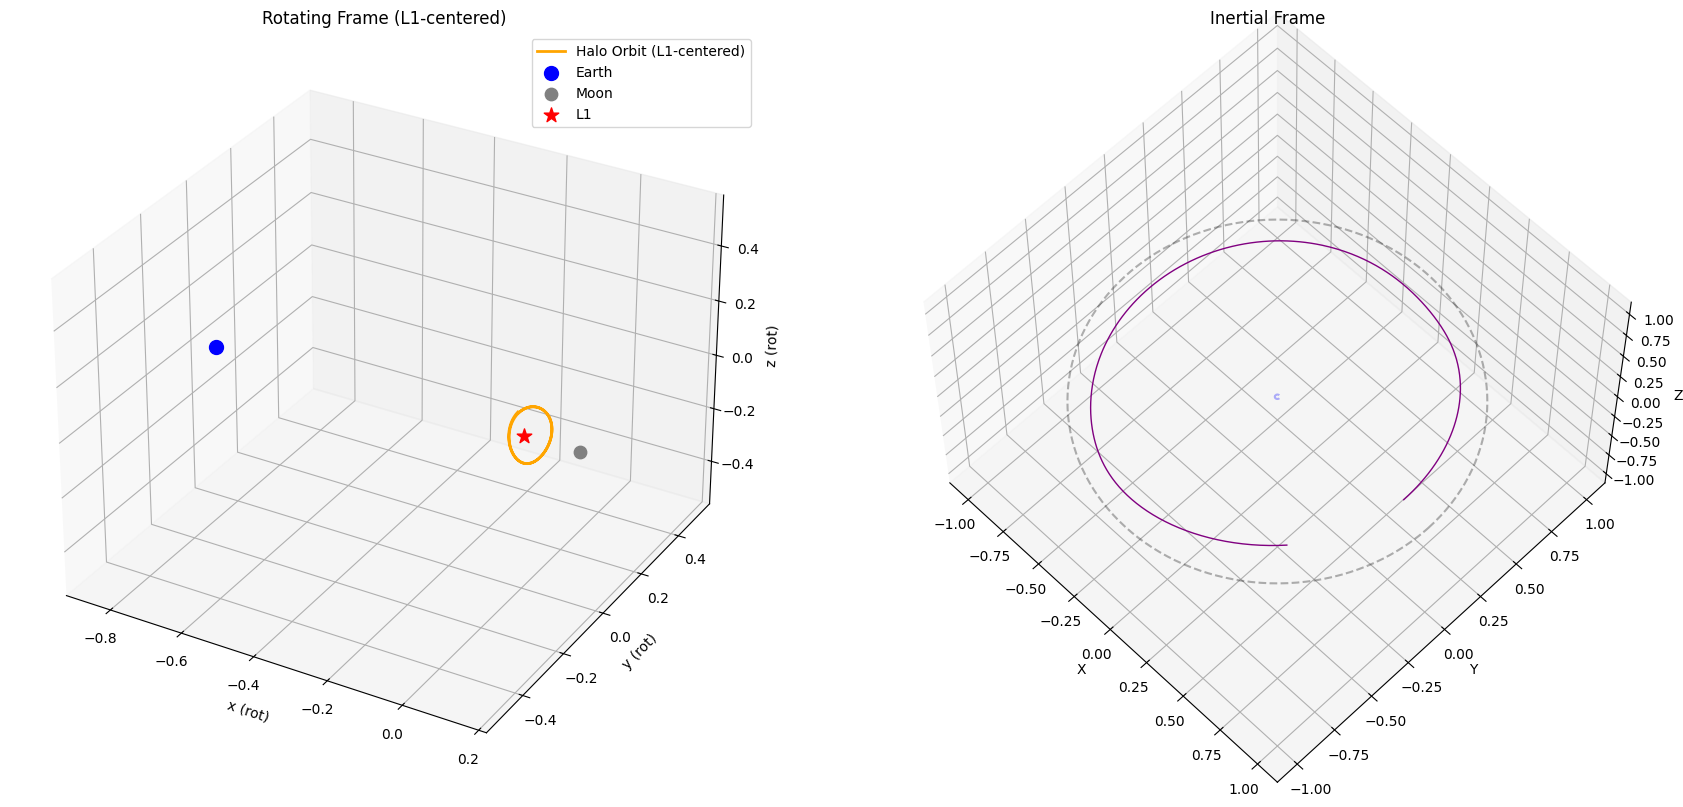

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path

# ============================================================
# Load Halo Orbit
# ============================================================

filename = "halo_earth-moon_L1.npy"
file_path = Path(filename)

if not file_path.exists():
    raise FileNotFoundError(f"File '{filename}' not found in current directory!")

halo_data = np.load(file_path)
print(f"Halo-Daten erfolgreich geladen. Shape: {halo_data.shape}")

N = halo_data.shape[0]

# ============================================================
# Time reconstruction (einfach wie vorher: dt = 0.01)
# ============================================================

dt = 0.01              # wie in deiner ursprünglichen Zelle
t = np.arange(N) * dt  # Winkel = t, da ω = 1 im CR3BP

# ============================================================
# CR3BP constants (Earth–Moon)
# ============================================================
mu = 0.012150585609624
earth_pos = np.array([-mu, 0.0, 0.0])
moon_pos  = np.array([1.0 - mu, 0.0, 0.0])

# Approx L1 (oder direkt aus constants.py übernehmen)
x_L1 = 1.0 - (mu/3.0)**(1.0/3.0)
l1_pos = np.array([x_L1, 0.0, 0.0])

# ============================================================
# Helpers
# ============================================================

def to_inertial(state_rot, t_array):
    """
    Convert from rotating frame → inertial.
    Rotation angle = t (because ω = 1 in normalized CR3BP units).
    """
    x = state_rot[:, 0]
    y = state_rot[:, 1]
    z = state_rot[:, 2]

    c = np.cos(t_array)
    s = np.sin(t_array)

    x_in = x * c - y * s
    y_in = x * s + y * c
    z_in = z

    return np.column_stack((x_in, y_in, z_in))

def set_axes_equal(ax):
    """Force equal aspect ratio in 3D plots."""
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    y_range = abs(y_limits[1] - y_limits[0])
    z_range = abs(z_limits[1] - z_limits[0])
    plot_radius = 0.5 * max([x_range, y_range, z_range])

    mid_x = np.mean(x_limits)
    mid_y = np.mean(y_limits)
    mid_z = np.mean(z_limits)

    ax.set_xlim3d([mid_x - plot_radius, mid_x + plot_radius])
    ax.set_ylim3d([mid_y - plot_radius, mid_y + plot_radius])
    ax.set_zlim3d([mid_z - plot_radius, mid_z + plot_radius])

# ============================================================
# L1-zentrierte Koordinaten im rotierenden Frame
# ============================================================

halo_l1 = halo_data[:, :3] - l1_pos
earth_l1 = earth_pos - l1_pos
moon_l1  = moon_pos  - l1_pos

# ============================================================
# Inertial Transform
# ============================================================

halo_inertial = to_inertial(halo_data, t)

# ============================================================
# Plotting
# ============================================================

fig = plt.figure(figsize=(18, 8))

# -------------------------------------------
# LEFT: Rotating Frame (L1-centered)
# -------------------------------------------
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot(
    halo_l1[:,0], halo_l1[:,1], halo_l1[:,2],
    label="Halo Orbit (L1-centered)", color="orange", lw=2
)

ax1.scatter(*earth_l1, color='blue', s=100, label='Earth')
ax1.scatter(*moon_l1,  color='gray', s=80,  label='Moon')
ax1.scatter(0.0, 0.0, 0.0, color='red', marker='*', s=120, label='L1')

ax1.set_title("Rotating Frame (L1-centered)")
ax1.set_xlabel("x (rot)")
ax1.set_ylabel("y (rot)")
ax1.set_zlabel("z (rot)")
ax1.legend()
ax1.grid(True, alpha=0.3)

set_axes_equal(ax1)

# -------------------------------------------
# RIGHT: Inertial Frame
# -------------------------------------------
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(
    halo_inertial[:,0], halo_inertial[:,1], halo_inertial[:,2],
    label="Inertial Halo Orbit", color='purple', lw=1
)

# Earth & Moon orbits (circular, for context)
theta = np.linspace(0, 2*np.pi, 300)
earth_x = -mu * np.cos(theta)
earth_y = -mu * np.sin(theta)
moon_x  = (1.0 - mu) * np.cos(theta)
moon_y  = (1.0 - mu) * np.sin(theta)

ax2.plot(earth_x, earth_y, np.zeros_like(theta), 'b--', alpha=0.3)
ax2.plot(moon_x,  moon_y,  np.zeros_like(theta), 'k--', alpha=0.3)

ax2.set_title("Inertial Frame")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

ax2.view_init(elev=60, azim=-45)
set_axes_equal(ax2)

plt.tight_layout()
plt.show()


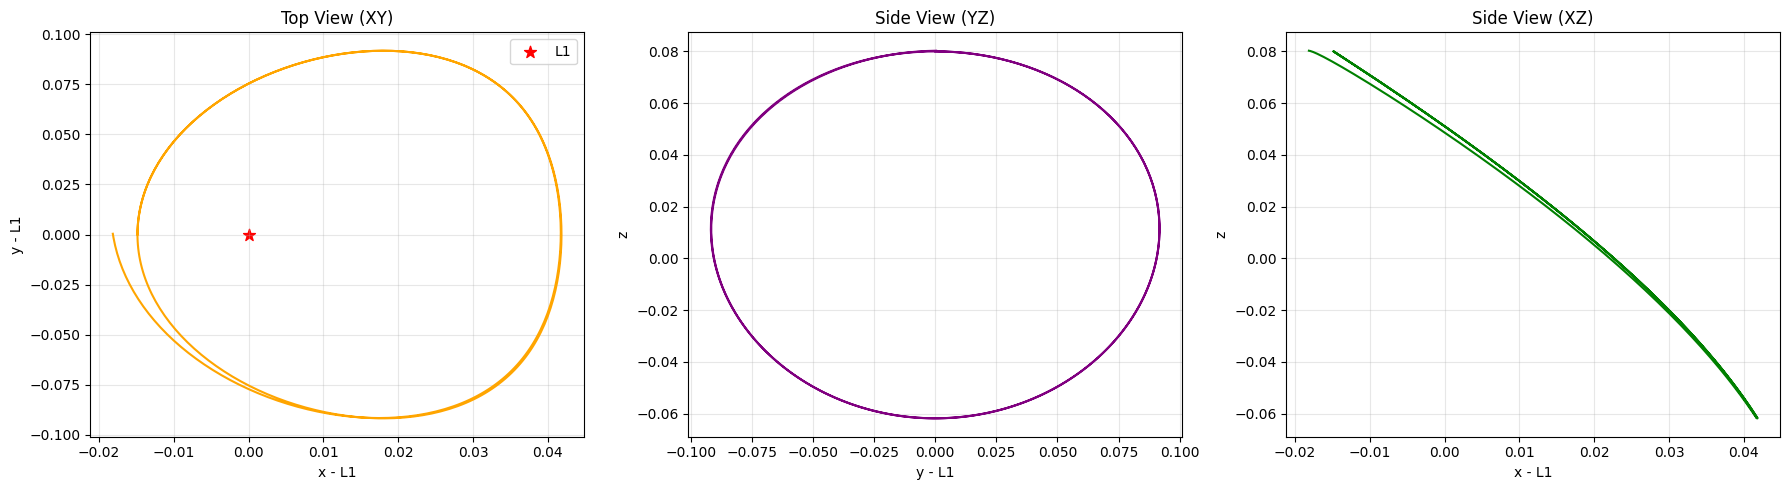

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ============================================================
# Load halo orbit
# ============================================================

filename = "halo_earth-moon_L1.npy"
halo_data = np.load(filename)
N = halo_data.shape[0]

# ============================================================
# L1 coordinate
# ============================================================

mu = 0.012150585609624
x_L1 = 1.0 - (mu/3.0)**(1.0/3.0)
l1_pos = np.array([x_L1, 0.0, 0.0])

# L1-centered rotating frame
halo_l1 = halo_data[:, :3] - l1_pos

x = halo_l1[:, 0]
y = halo_l1[:, 1]
z = halo_l1[:, 2]

# ============================================================
# Plot: Top-view, Side-view YZ, Side-view XZ
# ============================================================

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# ------------------------------
# 1) Top view (XY plane)
# ------------------------------
axs[0].plot(x, y, color="orange")
axs[0].set_title("Top View (XY)")
axs[0].set_xlabel("x - L1")
axs[0].set_ylabel("y - L1")
axs[0].grid(alpha=0.3)
axs[0].scatter(0, 0, s=80, c="red", marker="*", label="L1")
axs[0].legend()

# ------------------------------
# 2) Side view (YZ plane)
# ------------------------------
axs[1].plot(y, z, color="purple")
axs[1].set_title("Side View (YZ)")
axs[1].set_xlabel("y - L1")
axs[1].set_ylabel("z")
axs[1].grid(alpha=0.3)

# ------------------------------
# 3) Side view (XZ plane)
# ------------------------------
axs[2].plot(x, z, color="green")
axs[2].set_title("Side View (XZ)")
axs[2].set_xlabel("x - L1")
axs[2].set_ylabel("z")
axs[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


Halo data loaded. Shape: (556, 6)


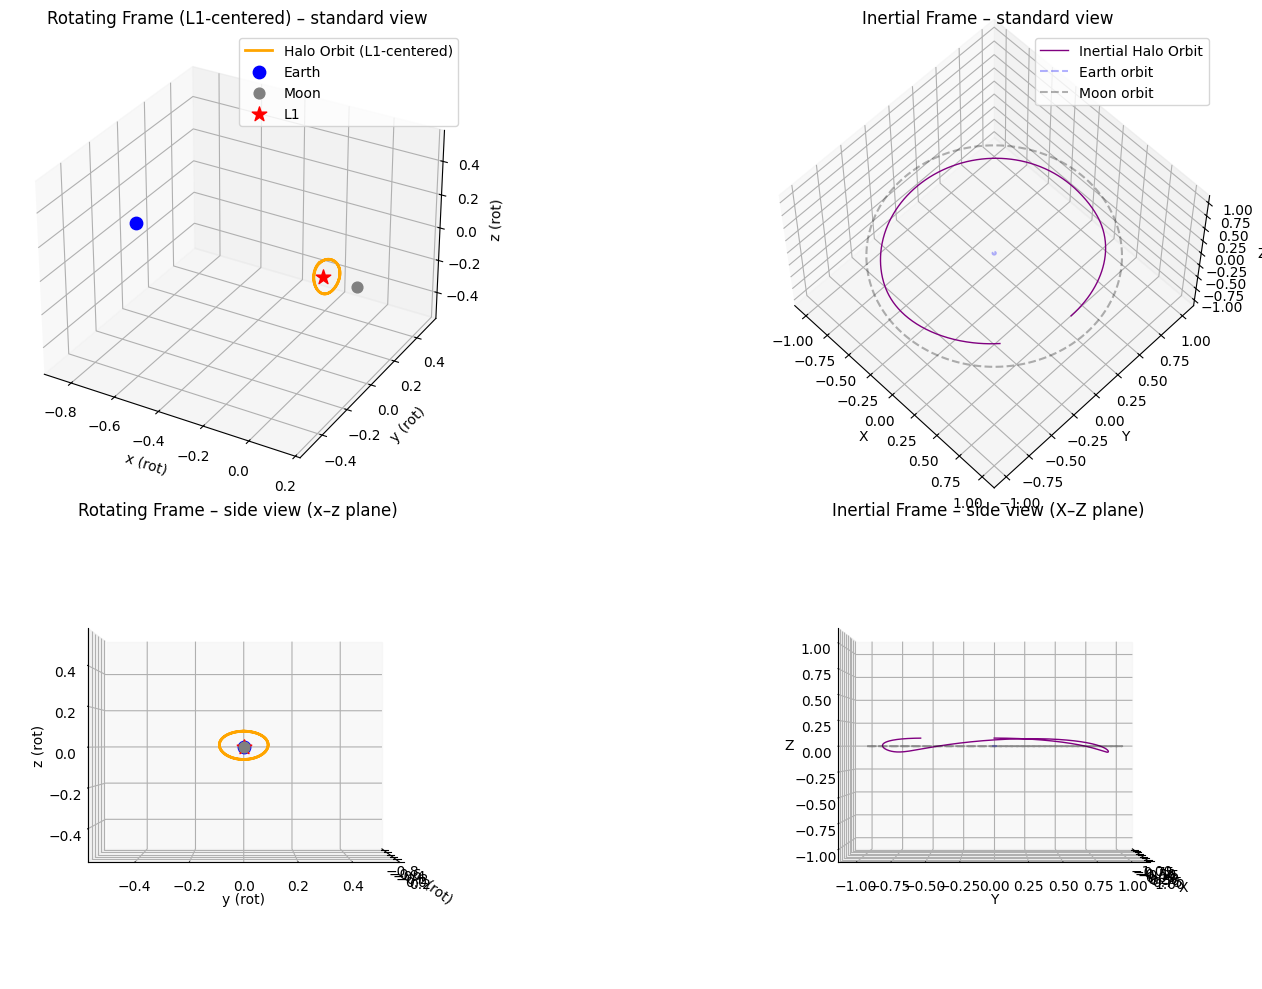

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from pathlib import Path

# ============================================================
# Load halo orbit
# ============================================================

filename = "halo_earth-moon_L1.npy"
file_path = Path(filename)

if not file_path.exists():
    raise FileNotFoundError(f"File '{filename}' not found in current directory!")

halo_data = np.load(file_path)
print(f"Halo data loaded. Shape: {halo_data.shape}")

N = halo_data.shape[0]

# ============================================================
# Time reconstruction (consistent with previous plotting)
# ============================================================

dt = 0.01
t = np.arange(N) * dt

# ============================================================
# CR3BP constants (Earth–Moon)
# ============================================================

mu = 0.012150585609624
earth_pos = np.array([-mu, 0.0, 0.0])
moon_pos  = np.array([1.0 - mu, 0.0, 0.0])

# Approximate L1 position (or load from constants.py)
x_L1 = 1.0 - (mu / 3.0) ** (1.0 / 3.0)
l1_pos = np.array([x_L1, 0.0, 0.0])

# ============================================================
# Helpers
# ============================================================

def to_inertial(state_rot: np.ndarray, t_array: np.ndarray) -> np.ndarray:
    """
    Convert from rotating frame to inertial frame.
    Rotation angle = t (angular speed = 1 in normalized CR3BP).
    """
    x = state_rot[:, 0]
    y = state_rot[:, 1]
    z = state_rot[:, 2]

    c = np.cos(t_array)
    s = np.sin(t_array)

    x_in = x * c - y * s
    y_in = x * s + y * c
    z_in = z

    return np.column_stack((x_in, y_in, z_in))

def set_axes_equal(ax):
    """Force equal aspect ratio for a 3D axes."""
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    y_range = abs(y_limits[1] - y_limits[0])
    z_range = abs(z_limits[1] - z_limits[0])
    plot_radius = 0.5 * max([x_range, y_range, z_range])

    mid_x = np.mean(x_limits)
    mid_y = np.mean(y_limits)
    mid_z = np.mean(z_limits)

    ax.set_xlim3d([mid_x - plot_radius, mid_x + plot_radius])
    ax.set_ylim3d([mid_y - plot_radius, mid_y + plot_radius])
    ax.set_zlim3d([mid_z - plot_radius, mid_z + plot_radius])

# ============================================================
# L1-centered rotating frame + inertial transform
# ============================================================

halo_l1 = halo_data[:, :3] - l1_pos
earth_l1 = earth_pos - l1_pos
moon_l1  = moon_pos  - l1_pos

halo_inertial = to_inertial(halo_data, t)

# ============================================================
# Plot: 2x2 views
#   (1) Rotating, standard view
#   (2) Inertial, standard view
#   (3) Rotating, side view (look along +y, see x-z plane)
#   (4) Inertial, side view
# ============================================================

fig = plt.figure(figsize=(18, 10))

# -----------------------------------------------------------
# (1) Rotating frame (L1-centered), standard perspective
# -----------------------------------------------------------
ax1 = fig.add_subplot(2, 2, 1, projection="3d")
ax1.plot(
    halo_l1[:, 0], halo_l1[:, 1], halo_l1[:, 2],
    label="Halo Orbit (L1-centered)", color="orange", lw=2,
)
ax1.scatter(*earth_l1, color="blue", s=80, label="Earth")
ax1.scatter(*moon_l1,  color="gray", s=60, label="Moon")
ax1.scatter(0.0, 0.0, 0.0, color="red", marker="*", s=120, label="L1")

ax1.set_title("Rotating Frame (L1-centered) – standard view")
ax1.set_xlabel("x (rot)")
ax1.set_ylabel("y (rot)")
ax1.set_zlabel("z (rot)")
ax1.legend()
ax1.grid(alpha=0.3)
set_axes_equal(ax1)

# -----------------------------------------------------------
# (2) Inertial frame, standard perspective
# -----------------------------------------------------------
ax2 = fig.add_subplot(2, 2, 2, projection="3d")
ax2.plot(
    halo_inertial[:, 0], halo_inertial[:, 1], halo_inertial[:, 2],
    label="Inertial Halo Orbit", color="purple", lw=1,
)

theta = np.linspace(0, 2 * np.pi, 300)
earth_x = -mu * np.cos(theta)
earth_y = -mu * np.sin(theta)
moon_x  = (1.0 - mu) * np.cos(theta)
moon_y  = (1.0 - mu) * np.sin(theta)

ax2.plot(earth_x, earth_y, np.zeros_like(theta), "b--", alpha=0.3, label="Earth orbit")
ax2.plot(moon_x,  moon_y,  np.zeros_like(theta), "k--", alpha=0.3, label="Moon orbit")

ax2.set_title("Inertial Frame – standard view")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.view_init(elev=60, azim=-45)
ax2.legend()
ax2.grid(alpha=0.3)
set_axes_equal(ax2)

# -----------------------------------------------------------
# (3) Rotating frame (L1-centered), SIDE view
#     Look along +y → x horizontal, z vertical
# -----------------------------------------------------------
ax3 = fig.add_subplot(2, 2, 3, projection="3d")
ax3.plot(
    halo_l1[:, 0], halo_l1[:, 1], halo_l1[:, 2],
    color="orange", lw=2,
)
ax3.scatter(*earth_l1, color="blue", s=80)
ax3.scatter(*moon_l1,  color="gray", s=60)
ax3.scatter(0.0, 0.0, 0.0, color="red", marker="*", s=120)

ax3.set_title("Rotating Frame – side view (x–z plane)")
ax3.set_xlabel("x (rot)")
ax3.set_ylabel("y (rot)")
ax3.set_zlabel("z (rot)")

# view along +y axis → side view of x–z
ax3.view_init(elev=0.0, azim=0.0)
ax3.grid(alpha=0.3)
set_axes_equal(ax3)

# -----------------------------------------------------------
# (4) Inertial frame, SIDE view
# -----------------------------------------------------------
ax4 = fig.add_subplot(2, 2, 4, projection="3d")
ax4.plot(
    halo_inertial[:, 0], halo_inertial[:, 1], halo_inertial[:, 2],
    color="purple", lw=1,
)

ax4.plot(earth_x, earth_y, np.zeros_like(theta), "b--", alpha=0.3)
ax4.plot(moon_x,  moon_y,  np.zeros_like(theta), "k--", alpha=0.3)

ax4.set_title("Inertial Frame – side view (X–Z plane)")
ax4.set_xlabel("X")
ax4.set_ylabel("Y")
ax4.set_zlabel("Z")

# view along +Y → see X–Z structure
ax4.view_init(elev=0.0, azim=0.0)
ax4.grid(alpha=0.3)
set_axes_equal(ax4)

plt.tight_layout()
plt.show()


In [4]:
dist = np.linalg.norm(halo_l1, axis=1)


In [5]:
R_min = dist.min()
R_max = dist.max()
R_mean = dist.mean()

print("Min distance to L1:", R_min)
print("Max distance to L1:", R_max)
print("Mean distance to L1:", R_mean)


Min distance to L1: 0.07456382460440256
Max distance to L1: 0.09436341353595054
Mean distance to L1: 0.0864902563720251


In [6]:
i_min = dist.argmin()
i_max = dist.argmax()

print("Min at t =", t[i_min])
print("Max at t =", t[i_max])


Min at t = 4.17
Max at t = 3.46
